# Astrid's notebook

### Libraries

In [12]:
import numpy as np
import cv2
import pydicom as dicom
from matplotlib import pyplot as plt

### Idea: template matching

In [167]:
# Converting template from png to jpg

from PIL import Image

# im1 = Image.open(r'template.png')
# rgb_im = im1.convert('RGB')
# rgb_im.save(r'template.jpg')

# im2 = Image.open(r'test_image.png')
# rgb_im2 = im2.convert('RGB')
# rgb_im2.save(r'test_image.jpg')

im3 = Image.open(r'template_inv.png')
rgb_im3 = im3.convert('RGB')
rgb_im3.save(r'template_inv.jpg')

In [ ]:
## NOT WORKING

# Converting dicom to jpg
# Link: https://pypi.org/project/dicom2jpg/
# Link: https://pycad.co/how-to-convert-a-dicom-image-into-jpg-or-png/
import dicom2jpg

# dicom_img_01 = "2018-04-30-12-41-28.dcm"
# print(type(dicom_img_01))
# dicom2jpg.dicom2jpg(dicom_img_01)  
# print(type(dicom_img_01))

ds = dicom.dcmread('2018-04-30-12-41-28.dcm')

new_image = ds.pixel_array.astype(float)
scaled_image = (np.maximum(new_image, 0) / new_image.max()) * 255.0
scaled_image = np.uint8(scaled_image)
final_image = Image.fromarray((scaled_image*255).astype(np.uint8))
final_image.show()
final_image.save('image.jpg')
final_image.save('image.png')

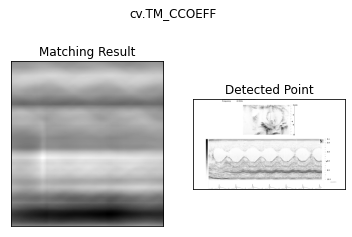

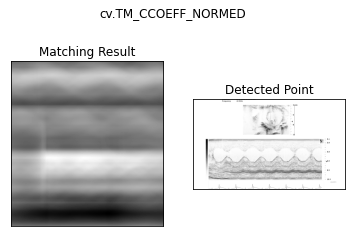

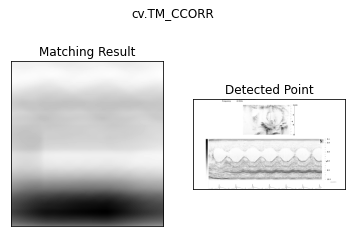

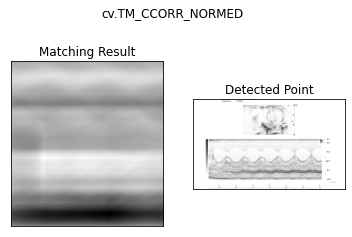

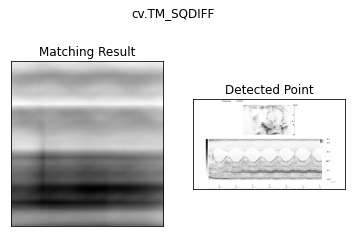

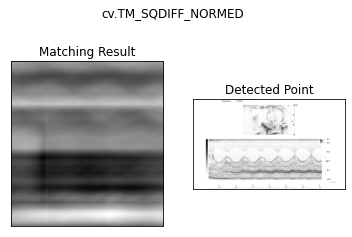

In [26]:
# Link: https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('test_image.jpg',0)
img = 255-img
img2 = img.copy()
template = cv.imread('template_inv.jpg',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

### Just inverting the image and trying to measure something

In [3]:
img = cv2.imread("small_test_image.png", 0)
#img = 255-img
implot = plt.imshow(img, cmap="gray")

NameError: name 'plt' is not defined

In [53]:
# DOES NOT WORK 
# because we need to find the longest stretch of low values (black cells)

# Go through columns in image

print(len(img[0]))

# Go through every column

xy_caves = []

for i in range(len(img[0])):
    col = img[:,i]
    
    # Go through each pixel in column
    cave = False
    start, end = None, None
    for j in range(len(col)):
        if col[j] <= 4:
            if cave == False:
                start = [i,j]  #xy coordinates for start of vertical line in cave
                cave = True
        else:
            if cave == True:
                end = [i,j]  #xy coordinates for end of vertical line in cave
                cave == False
                break
    xy_caves.append([start,end])
            


            

    


1424


In [54]:
# Looking at one column 

print(xy_caves[350:360])

[[[350, 115], [350, 155]], [[351, 57], [351, 58]], [[352, 57], [352, 58]], [[353, 57], [353, 58]], [[354, 57], [354, 58]], [[355, 57], [355, 58]], [[356, 57], [356, 58]], [[357, 57], [357, 59]], [[358, 57], [358, 58]], [[359, 56], [359, 58]]]


In [52]:
print(img[:,350])

[  9  22  35  53  76  98 121 113 100  86  74  62  50  38  35  38  42  45
  51  57  62  69  74  80  86  79  65  50  35  29  23  18  15  15  14  15
  14  14  14  14  15  15  15  14  10   7   5   5   8   8  10  11  13  15
  13  10   8   6   6   7   7   8   9  10  13  11  10   9   6   6   7   7
   8   8   8   8   7   8   9   8   9   8   9   9   9  10  10   9   9   8
   7   8   9   9   9   8   8   7   9  12  16  18  16  13  11  10  10   9
   8   7   8   8   7   5   5   4   4   4   4   4   3   3   3   3   3   3
   2   1   3   2   1   2   2   2   3   3   3   2   3   3   2   2   3   3
   4   3   3   3   3   4   3   3   4   4   4   5   5   5   4   4   5   4
   4   5   5   4   5   4   5   4   5   5   5   5   6   6   6   5   5   5
   5   6   6   6   6   6   6   6   6   7   6   6   6   7   7   8   7   7
   8   7   7   8   8   8   8   8   8   9  10   9   9   9   9   9  10   9
   9   9  10  10  10  10  10   9  10   9   8   7   6   5   5   4   4   4
   5   6   6   7   8   9   9   9  10   9  10  11  1

## LVID (maybe PSLA, maybe SAX)

Text(0.5, 1.0, 'Outline of IVS/LVAW, LVID and LVPW measurements')

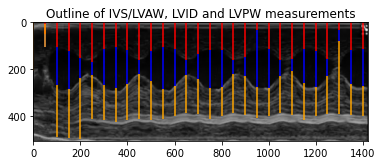

In [60]:
# Link: https://www.geeksforgeeks.org/longest-sequence-positive-integers-array/
# Python code to find longest running
# sequence of positive integers.
 
 
def getLongestSeq_LVID(a, n):
    maxIdx = 0
    maxLen = 0
    currLen = 0
    currIdx = 0
    for k in range(n):
        if a[k] < 15:
            currLen += 1
 
            # New sequence, store
            # beginning index.
            if currLen == 1:
                currIdx = k
        else:
            if currLen > maxLen:
                maxLen = currLen
                maxIdx = currIdx
            currLen = 0
 
    if currLen > maxLen:
        maxLen = currLen
        maxIdx = currIdx
 
    if maxLen > 0:
        return maxIdx, maxLen #print('Index : ', maxIdx, ',Length : ', maxLen,)
    else:
        return 0,0 #print("No positive sequence detected.")

def getLongestSeq_below_LVPW(a, n):
    maxIdx = 0
    maxLen = 0
    currLen = 0
    currIdx = 0
    for k in range(n):
        if a[k] > 100:
            currLen += 1
 
            # New sequence, store
            # beginning index.
            if currLen == 1:
                currIdx = k
        else:
            if currLen > maxLen:
                maxLen = currLen
                maxIdx = currIdx
            currLen = 0
 
    if currLen > maxLen:
        maxLen = currLen
        maxIdx = currIdx
 
    if maxLen > 0:
        return maxIdx, maxLen #print('Index : ', maxIdx, ',Length : ', maxLen,)
    else:
        return 0,0 #print("No positive sequence detected.")


start_LVID_x = []
end_LVID_y = []
start_below_LVPW_x = []
end_below_LVPW_y = []

for i in range(len(img[0])):
    col = img[:,i]
    n_ = len(col)
    
    start_LVID,stretch_LVID = getLongestSeq_LVID(col, n_)
    
    # LVID start and end 
    start_LVID_x.append(start_LVID)
    end_LVID_y.append(start_LVID+stretch_LVID)

    start_LVPW,stretch_LVPW = getLongestSeq_below_LVPW(col, n_)
    
    start_below_LVPW_x.append(start_LVPW)
    end_below_LVPW_y.append(start_LVPW+stretch_LVPW)

    # LVPW Goes from start_below_LVPW_x to end_LVID_y
    # IVS goes from start_LVID_x to top of frame at 0

# Saving the measurements 
IVS_LVAW = np.array(start_LVID_x)
LVID = np.array(end_LVID_y) - np.array(start_LVID_x)  
LVPW = np.array(start_below_LVPW_x) - np.array(end_LVID_y)

plt.imshow(img, cmap="gray")
for i in range(0,len(start_LVID_x),50):
    #IVS/LVAW
    plt.vlines(i, start_LVID_x[i], 0, colors="red")

    #LVID
    plt.vlines(i, start_LVID_x[i], end_LVID_y[i], colors="blue")
    
    #LVPW
    plt.vlines(i, start_below_LVPW_x[i], end_LVID_y[i], colors="orange")
plt.title("Outline of IVS/LVAW, LVID and LVPW measurements")

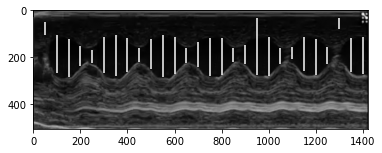

In [33]:
plt.imshow(img, cmap="gray")
for i in range(0,len(start_x),50):
    plt.vlines(i, start_x[i], end_y[i], colors="white")

In [61]:
# Checking the numbers 
print(IVS_LVAW[350:360])
print(LVID[350:360]) 
print(LVPW[350:360])

[103 103 103 103 102 112 114 115 114 113]
[176 176 174 176 176 166 107 163 165 165]
[143 143 145 143 144 144 201 144 143 144]


### Identifying diastole and systole measurements

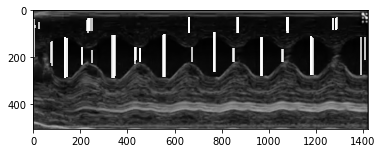

In [111]:
## Smoothing output 
from scipy.signal import argrelextrema

# Link: https://scipy-cookbook.readthedocs.io/items/SignalSmooth.html
def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """
    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y[int((window_len-1)/2):-int((window_len-1)/2)]


#Link: https://stackoverflow.com/questions/4624970/finding-local-maxima-minima-with-numpy-in-a-1d-numpy-array

windows=['flat', 'hanning', 'hamming', 'bartlett', 'blackman']
for w in windows:
    LVID_smooth = smooth(LVID,155,w)
    plt.imshow(img, cmap="gray")
    for i in list(argrelextrema(LVID_smooth, np.greater)[0]):
        plt.vlines(i, start_LVID_x[i], end_LVID_y[i], colors="white")
    plt.savefig("diastole_{}.png".format(w))

    plt.imshow(img, cmap="gray")
    for i in list(argrelextrema(LVID_smooth, np.less)[0]):
        plt.vlines(i, start_LVID_x[i], end_LVID_y[i], colors="white")
    plt.savefig("systole_{}.png".format(w))

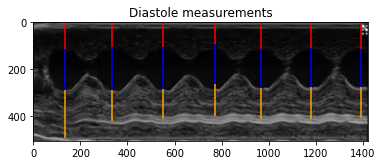

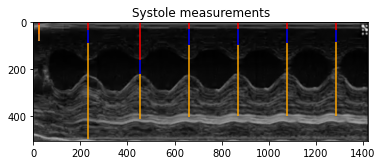

In [117]:

LVID_diastole = []
LVID_systole = []

IVS_LVAW_diastole = []
IVS_LVAW_systole = []

LVPW_diastole = []
LVPW_systole = []

LVID_smooth = smooth(LVID,155,"blackman")
plt.imshow(img, cmap="gray")
for i in list(argrelextrema(LVID_smooth, np.greater)[0]):
    # Saving the values
    LVID_diastole.append(end_LVID_y[i]-start_LVID_x[i])
    IVS_LVAW_diastole.append(start_LVID_x[i])
    LVPW_diastole.append(start_below_LVPW_x[i] - end_LVID_y[i])

    #IVS/LVAW
    plt.vlines(i, start_LVID_x[i], 0, colors="red")
    #LVID
    plt.vlines(i, start_LVID_x[i], end_LVID_y[i], colors="blue")
    #LVPW
    plt.vlines(i, start_below_LVPW_x[i], end_LVID_y[i], colors="orange")
    plt.title("Diastole measurements")
plt.show()

plt.imshow(img, cmap="gray")
for i in list(argrelextrema(LVID_smooth, np.less)[0]):
    # Saving the values
    LVID_systole.append(end_LVID_y[i]-start_LVID_x[i])
    IVS_LVAW_systole.append(start_LVID_x[i])
    LVPW_systole.append(start_below_LVPW_x[i] - end_LVID_y[i])

    #IVS/LVAW
    plt.vlines(i, start_LVID_x[i], 0, colors="red")
    #LVID
    plt.vlines(i, start_LVID_x[i], end_LVID_y[i], colors="blue")
    #LVPW
    plt.vlines(i, start_below_LVPW_x[i], end_LVID_y[i], colors="orange")
    plt.title("Systole measurements")

plt.show()



## Infering length from scale 

In [119]:
# The scale in the image goes from 2.8 to 10.9 so the whole scale is:
full_length = 10.9-2.8

# We divide this by the number of pixels in a column,
# so we can convert from pixel stretch to actual measurement
one_pixel_length = full_length/len(img[:,0])


# Actual measurements of IVS/LVAW, LVID and LVPW
LVID_diastole_real = np.array(LVID_diastole)  * one_pixel_length 
LVID_systole_real = np.array(LVID_systole) * one_pixel_length

IVS_LVAW_diastole_real = np.array(IVS_LVAW_diastole) * one_pixel_length
IVS_LVAW_systole_real = np.array(IVS_LVAW_systole) * one_pixel_length

LVPW_diastole_real = np.array(LVPW_diastole) * one_pixel_length
LVPW_systole_real = np.array(LVPW_systole) * one_pixel_length


# Average measurements
LVID_d = np.mean(LVID_diastole_real)
LVID_s = np.mean(LVID_systole_real)

IVS_LVAW_d = np.mean(IVS_LVAW_diastole_real)
IVS_LVAW_s = np.mean(IVS_LVAW_systole_real)

LVPW_d = np.mean(LVPW_diastole_real)
LVPW_s = np.mean(LVPW_systole_real)

### Calculating parameters

In [127]:
LVESV = (7/(2.4+LVID_s))*LVID_s**3
LVEDV = (7/(2.4+LVID_d))*LVID_d**3

FS = ((LVID_d - LVID_s)/LVID_d)*100
EF = ((LVEDV-LVESV)/LVEDV)*100

SV = LVEDV - LVESV
CO = SV*450   

# Only for SAX images
LV_mass = 1.04*(((LVID_d+IVS_LVAW_d+LVPW_d)**3)-(LVID_d**3))*0.8+0.6

# Only for PSLA images
RWT = (LVPW_d+IVS_LVAW_d)/LVID_d


## Checking values against normal range

In [133]:
count = 0

if LVESV < 19.35-11.3 or LVESV > 19.35+11.3:
    count += 1
if LVEDV < 57.7-16.5 or LVEDV > 57.7+16.5:
    count += 1
if FS < 43-9 or FS > 43+9:
    count += 1
if EF < 71-11 or EF > 71+11:
    count += 1
if SV < 35.1-8.5 or SV > 35.1+8.5:
    count += 1
if CO < 17.7-3.8 or CO > 17.7+3.8:
    count += 1
if LV_mass < 96-18 or LV_mass > 96+18:
    count +=1
# OBS there is no measurement for RWT, so I don't know why we calculate it

if count >= 3:
    print("ALARM! This mouse has a sick heart!")
    print("This heart presents {} abnormal values.".format(count))

ALARM! This mouse has a sick heart!
This heart presents 6 abnormal values.


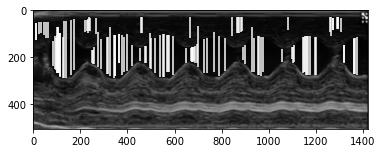

In [72]:
# Diastole is max width, systole is min width both of LVID
from scipy.signal import argrelextrema


plt.imshow(img, cmap="gray")
for i in list(argrelextrema(LVID, np.greater)[0]):
    plt.vlines(i, start_LVID_x[i], end_LVID_y[i], colors="white")


### Infering length from scale

In [63]:
# The scale in the image goes from 2.8 to 10.9 so the whole scale is:
full_length = 10.9-2.8

# We divide this by the number of pixels in a column,
# so we can convert from pixel stretch to actual measurement
one_pixel_length = full_length/len(img[:,0])

# Actual measurements of IVS/LVAW, LVID and LVPW
IVS_LVAW_real = IVS_LVAW * one_pixel_length
LVID_real = LVID * one_pixel_length
LVPW_real = LVPW * one_pixel_length

### Trying to calculate parameters

### Finding stretch of lightest part of image

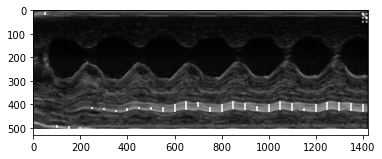

In [34]:
# Link: https://www.geeksforgeeks.org/longest-sequence-positive-integers-array/
# Python code to find longest running
# sequence of positive integers.
 
 
def getLongestSeq_below_LVPW(a, n):
    maxIdx = 0
    maxLen = 0
    currLen = 0
    currIdx = 0
    for k in range(n):
        if a[k] > 100:
            currLen += 1
 
            # New sequence, store
            # beginning index.
            if currLen == 1:
                currIdx = k
        else:
            if currLen > maxLen:
                maxLen = currLen
                maxIdx = currIdx
            currLen = 0
 
    if currLen > maxLen:
        maxLen = currLen
        maxIdx = currIdx
 
    if maxLen > 0:
        return maxIdx, maxLen #print('Index : ', maxIdx, ',Length : ', maxLen,)
    else:
        return 0,0 #print("No positive sequence detected.")


start_x = []
end_y = []

for i in range(len(img[0])):
    col = img[:,i]
    n_ = len(col)
    
    start,stretch = getLongestSeq_below_LVPW(col, n_)
    
    start_x.append(start)
    end_y.append(start+stretch)


plt.imshow(img, cmap="gray")
for i in range(0,len(start_x),50):
    plt.vlines(i, start_x[i], end_y[i], colors="white")


## Goal: Pull HR and scale from image

<class 'bytes'>
165110400
b'\x00\x00'


TypeError: Invalid shape (50, 936, 1176, 3) for image data

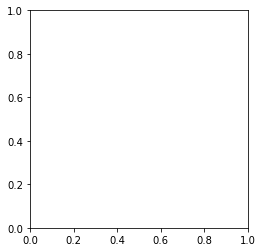

In [174]:
import matplotlib.pyplot as plt
from pydicom import dcmread
from pydicom.data import get_testdata_file

# The path to a pydicom test dataset
path = get_testdata_file("2018-04-30-12-41-28.dcm")
ds = dcmread("2018-04-30-12-41-28.dcm")
print(type(ds.PixelData))
print(len(ds.PixelData))
print(ds.PixelData[:2])
# `arr` is a numpy.ndarray
arr = ds.pixel_array
# arr = arr[:, :, :,0]
# print(type(arr))
# print(arr.shape)

# im = Image.fromarray(arr)
# rgb_im3 = im.convert('RGB')

plt.imshow(arr)  # .mean(axis=0)
plt.show()

# image = cv2.cvtColor(arr, cv2.COLOR_RGBA2GRAY)
# cv2.imshow('sample image dicom',image)

# cv2.waitkey()

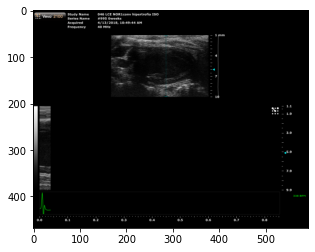

In [175]:
cap = cv2.VideoCapture('HACKATHON VIDEOS COR 2022/AVI/995/0W/AVI/2018-06-27-16-22-03_2018-04-13-10-49-44_1.avi')

ret, frame = cap.read()    
plt.figure()
plt.imshow(frame)